In [180]:
# Import library
import pandas as pd
import numpy as np

# Module for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To avoid unnecessary warning messages.
import warnings
warnings.filterwarnings('ignore')


# Built-in datasets
from sklearn.datasets import load_breast_cancer

# Create standardized data
from sklearn.preprocessing import StandardScaler

# Module for logistic regression model
from sklearn.linear_model import LogisticRegression

In [181]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

sns.set(style='white', context='notebook', palette='deep')

# 

# 

# Kaggle's Titanic Passenger Mortality Prediction Modeling

The Kaggle Titanic competition is a competition for machine learning beginners prepared by Kaggle.  It is a competition to machine learn the passenger information and "Survived" answers in the train data to create a prediction of whether a passenger survived or died based on the passenger information provided in the test data. 

In [182]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
answer=pd.read_csv('gender_submission.csv')

In [183]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [184]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#### The columns included in the data are as follows.

- PassengerId - Passenger identification unique ID
- Survived - Survival flag (0=dead, 1=alive)
- Pclass - Ticket class
- Name - Passenger's name
- Sex - Gender (male = male, female = female)
- Age 
- SibSp - Number of siblings/spouses on Titanic
- parch - Number of parents/children traveling on Titanic
- ticket - Ticket number
- fare 
- cabin - cabin number
- Embarked - port of embarkation

#### Pclass

- 1 = Upper class (rich)
- 2 = Intermediate class (general class)
- 3 = Lower class (working class)

#### Embarked

- C = Cherbourg
- Q = Queenstown
- S = Southampton

# 

# 

# 

## <font color= "red">〜GOAL〜</font>

###  <u>Aim for the most accurate prediction model as much as possible!</u>

# 

# 

# Data Cleaning

Check for missing "train" data

In [185]:
train.isnull().sum(axis=0) 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

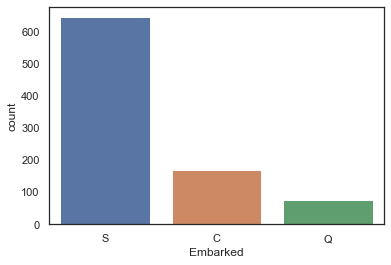

In [186]:
sns.countplot('Embarked',data=train)

- The median value of the entire "Age" is inserted into the missing data of "Age" as a proxy data.
- Since "S" is the most common in the data, "S" is placed in the missing data of "Embarked" this time.
- Cabin" is not relevant to the forecast data, so we ignore it this time.

In [187]:
train["Age"] = train["Age"].fillna(train["Age"].median())
train["Embarked"] = train["Embarked"].fillna("S")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 

## Converts categorical data strings to numbers.

In [188]:
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1
train["Embarked"][train["Embarked"] == "S" ] = 0
train["Embarked"][train["Embarked"] == "C" ] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2
train.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,NaN,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,1


# 

The "test" data is similarly checked for missing data, proxy data is inserted, and categorical data strings are converted to numbers.

In [189]:
test.isnull().sum(axis=0) 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [190]:
test["Age"] = test["Age"].fillna(test["Age"].median())
test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1
test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2
test["Fare"] = test["Fare"].fillna(test["Fare"].median())
test.head(10)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,0
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,2
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,1
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,0


# 

# The model used in this study is a "decision tree model".

###### https://qiita.com/3000manJPY/items/ef7495960f472ec14377

First, let's create a predict model with independent variables other than "PassengerId," "Name," "Ticket," and "Cabin," which are not relevant to the prediction.

In [191]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [192]:
# Obtain values for the dependent and independent variables for "train".
target = train["Survived"].values
features = train[["Pclass", "Sex", "Fare", "Age", "SibSp", "Parch", "Embarked"]].values
# Create decision tree model
my_tree_1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
#my_tree_1 =tree. DecisionTreeClassifier.score()
my_tree_1 = my_tree_1.fit(features, target)
# To get the value of the independent variable for "test"
test_features = test[["Pclass", "Sex", "Fare", "Age", "SibSp", "Parch", "Embarked"]].values
# Prediction with "my_tree_one" model using "test" independent variables
my_prediction = my_tree_1.predict(test_features)

In [193]:
print(my_prediction)

[0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0
 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1
 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 0 1 1 0 0 1 0 0 1]


In [194]:
answer= answer['Survived']

In [195]:
print(answer.values)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [196]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(answer.values, my_prediction)
print(cm)

[[205  61]
 [ 40 112]]


In [197]:
print('Accuracy is' , accuracy_score(answer.values, my_prediction))

Accuracy is 0.7583732057416268


# 

## <font color= "red">〜Aiming for higher precision〜</font>

# Find the each independent variable Feature Value and detect good variables with large effects.

 **Feature Value**・・・ In machine learning and pattern recognition, a feature is an individual measurable property or characteristic of a phenomenon.Choosing informative, discriminating and independent features is a crucial element of effective algorithms in pattern recognition, classification and regression. Features are usually numeric, but structural features such as strings and graphs are used in syntactic pattern recognition. The concept of "feature" is related to that of explanatory variable used in statistical techniques such as linear regression.

In [198]:
#Create a random forest model
RF = RandomForestClassifier(n_estimators=250,random_state=1)
RF.fit(features,target)

RandomForestClassifier(n_estimators=250, random_state=1)

In [199]:
#Get feature value and importance value
features = train[["Pclass", "Sex", "Fare", "Age", "SibSp", "Parch", "Embarked"]].columns
importances = RF.feature_importances_

# make a table
df = pd.DataFrame({"features":features,"importances":importances}).sort_values("importances", ascending=False)
df.reset_index(drop=True)

,features,importances
0,Fare,0.270900
1,Sex,0.263822
2,Age,0.256137
3,Pclass,0.087143
4,SibSp,0.051692
5,Parch,0.038120
6,Embarked,0.032187


The above table suggests that "Fare," "Sex," and "Age" contribute significantly to the forecast.
If we only use them as independent variables, the predictive value would increase...?

In [200]:
# Get the values of the dependent and independent variables for "train"
target_2 = train["Survived"].values
features_2 = train[["Sex", "Fare", "Age"]].values
# Create decision tree model
my_tree_2 = tree.DecisionTreeClassifier()
my_tree_2 = my_tree_2.fit(features_2, target_2)
# Get the value of the independent variable for "test"
test_features_2 = test[["Sex", "Fare", "Age"]].values
# Prediction with "my_tree_one" model using "test" independent variables
my_prediction_2 = my_tree_2.predict(test_features_2)

In [201]:
print(my_prediction_2)

[0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0
 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0
 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1
 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 0 0 1 0 0 0]


In [202]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(answer.values, my_prediction_2)
print(cm)

[[209  57]
 [ 42 110]]


In [203]:
print('Accuracy is' , accuracy_score(answer.values, my_prediction_2))

Accuracy is 0.7631578947368421


### Accuracy remained at approximately 0.76.

### 

### 

In [204]:
#Create a random forest model
RF = RandomForestClassifier(n_estimators=250,random_state=1)
RF.fit(features_2,target_2)

RandomForestClassifier(n_estimators=250, random_state=1)

In [205]:
#Get feature value and importance value
features = train[["Sex", "Fare", "Age"]].columns
importances = RF.feature_importances_

#make a table
df = pd.DataFrame({"features":features,"importances":importances}).sort_values("importances",ascending=False)
df.reset_index(drop=True)

,features,importances
0,Fare,0.441837
1,Age,0.292880
2,Sex,0.265282


## Possible Causes

- The number of data is not enough for just 891.
- Although the feature values are somewhat concentrated in "Fare", they are somewhat distributed among the three, making it difficult to determine which one to rely on.

### Then created a decision tree model with two explanatory variables as the top two feature values, "Fare" and "Age".

In [206]:
# Get the values of the dependent and independent variables for "train"
target_3 = train["Survived"].values
features_3 = train[["Sex", "Fare"]].values
# Create decision tree model
my_tree_3 = tree.DecisionTreeClassifier()
my_tree_3 = my_tree_3.fit(features_3, target_3)
# Get the value of the independent variable for "test"
test_features_3 = test[["Sex", "Fare"]].values
# Prediction with "my_tree_one" model using "test" independent variables
my_prediction_3 = my_tree_3.predict(test_features_3)

In [207]:
print(my_prediction_3)

[0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 0 0 1 0 0 0]


In [208]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(answer.values, my_prediction_3)
print(cm)

[[243  23]
 [ 30 122]]


In [209]:
print('Accuracy is' , accuracy_score(answer.values, my_prediction_3))

Accuracy is 0.8732057416267942


### Accuracy improved from about 0.76 to about 0.87.

# 

# 

In [210]:
#Create a random forest model
RF = RandomForestClassifier(n_estimators=250,random_state=1)
RF.fit(features_3,target_3)

RandomForestClassifier(n_estimators=250, random_state=1)

In [211]:
#Get feature value and importance value
features = train[["Sex", "Fare"]].columns
importances = RF.feature_importances_

#make a table
df = pd.DataFrame({"features":features,"importances":importances}).sort_values("importances",ascending=False)
df.reset_index(drop=True)

,features,importances
0,Fare,0.65932
1,Sex,0.34068


It is considerd that reducing the number of independent variables and concentrating the feature value toward "Fare" to some extent led to the improvement in accuracy.

Conversely, when we created a prediction model using only "Fare," which has the largest feature value as the independent variable, we obtained a Score of 0.67224. It is not good to rely on only "Fare".

# 

## <font color= "red">〜Aiming for higher precision〜</font>

## I noticed that children of passengers have a higher survival rate regardless of sex. Wouldn't it be better to classify the independent variable "Sex" into the three categories of "male", "female", and "child", and create a model to improve the accuracy?

In [212]:
# A person under 16 years of age is considered a child.

def male_female_child(passenger):
    # Get age and gender data.
    age,sex = passenger
    # Check age and if under 16, child. Otherwise, return gender as is.
    if age < 16:
        return '2'
    else:
        return sex
    
# Add a new column named person.
train['person'] = train[['Age','Sex']].apply(male_female_child,axis=1)
test['person'] = test[['Age','Sex']].apply(male_female_child,axis=1)

In [213]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,1,2


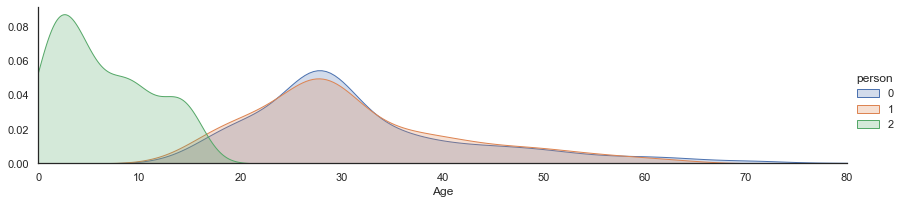

In [214]:
# FacetGrid allows you to draw multiple kernel density estimation graphs in a single plot.
fig = sns.FacetGrid(train, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = train['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

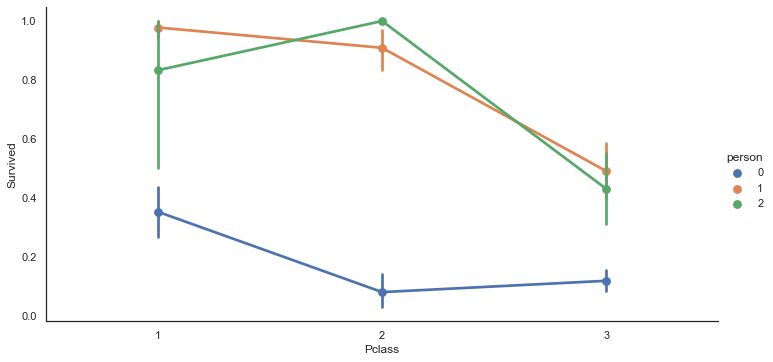

In [215]:
sns.catplot('Pclass', 'Survived', hue='person', data=train, order=[1,2,3], kind='point', aspect=2)

# 

I created a predictive model using "person" and "Fare" as indeoendent variables for the three categories of "male," "female," and "child."

In [216]:
# Get the values of the dependent and independent variables for "train"
target_4 = train["Survived"].values
features_4 = train[["person", "Fare"]].values
# Create decision tree model
my_tree_4 = tree.DecisionTreeClassifier()
my_tree_4 = my_tree_4.fit(features_4, target_4)
# Get the value of the independent variable for "test"
test_features_4 = test[["person", "Fare"]].values
# Prediction with "my_tree_one" model using "test" independent variables
my_prediction_4 = my_tree_4.predict(test_features_4)

In [217]:
print(my_prediction_4)

[0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 0 0 1 0 0 0]


In [218]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(answer.values, my_prediction_4)
print(cm)

[[241  25]
 [ 26 126]]


In [219]:
print('Accuracy is' , accuracy_score(answer.values, my_prediction_4))

Accuracy is 0.8779904306220095


### The scores were almost the same, although slightly improved from the model accuracy for the independent variables "Sex" and "Fare".

# 

### Check correlation coefficients

In [220]:
corr_mat = train.corr(method='pearson')
corr_mat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


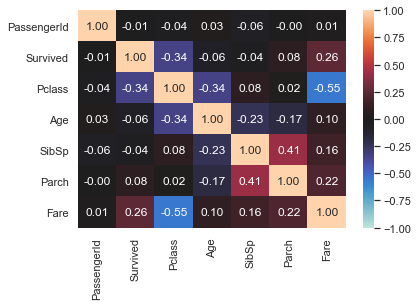

In [221]:
sns.heatmap(corr_mat,
            vmin=-1.0, #Minimum value
            vmax=1.0, #Maximum value
            center=0, #Median
            annot=True, # True:Display values in a grid
            fmt='.2f', #formatting
             xticklabels=corr_mat.columns.values,#X-axis label
            yticklabels=corr_mat.columns.values #Y-axis label
           )
plt.show()

### I created a predictive model using "Survived" and "Pclass" and "Fare" as explanatory variables, which had a slightly higher correlation with "Survived".

In [222]:
# Get the values of the dependent and independent variables for "train"
target_5 = train["Survived"].values
features_5 = train[["Pclass", "Fare"]].values
# Create decision tree model
my_tree_5 = tree.DecisionTreeClassifier()
my_tree_5 = my_tree_5.fit(features_5, target_5)
# Get the value of the independent variable for "test"
test_features_5 = test[["Pclass", "Fare"]].values
# Prediction with "my_tree_one" model using "test" independent variables
my_prediction_5 = my_tree_5.predict(test_features_5)

In [223]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(answer.values, my_prediction_5)
print(cm)

[[203  63]
 [ 94  58]]


In [224]:
print('Accuracy is' , accuracy_score(answer.values, my_prediction_5))

Accuracy is 0.6244019138755981


#### The accuracy has dropped considerably.

# 

I tried a Kaggle titanic competition by using a decision tree model. As a result, I created a prediction model with approximately 88% accuracy. Looking ahead, we may be able to create even more accurate models by using not only decision tree models but also other machine learning methods such as logistic regression models and random forests.

### Fin.